In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

model_save_path = './PredictModel/demo.hdf5'
DATA_PATH = [
    './Data/1_Hà Nội_covid_data.csv', 
]

# Data visualizing

In [2]:
df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df[path] = pd.read_csv(DATA_PATH[path])
    df[path].drop(df[path].tail(26).index,inplace=True)
    for idx in range(len(df[path].index)):
        df[path].iat[idx, 0] = datetime.strptime(df[path].iat[idx, 0], '%Y-%m-%d %H:%M:%S')
    df[path] = df[path].sort_values(by=['date'])
    df[path] = df[path].drop(columns=['Unnamed: 9'])

In [3]:
df[0].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,13560,5300471.0,0.0,0.0,6.0,22554.0,0.0,0.0
594,2022-04-13 00:00:00,13818,5314289.0,0.0,0.0,2.0,22556.0,0.0,0.0
634,2022-04-14 00:00:00,12824,5327113.0,0.0,0.0,5.0,22561.0,0.0,0.0
197,2022-04-15 00:00:00,11473,5338586.0,0.0,0.0,4.0,22565.0,0.0,0.0
34,2022-04-16 00:00:00,10291,5353757.0,0.0,0.0,2.0,22567.0,0.0,0.0
607,2022-04-17 00:00:00,8521,5361294.0,0.0,0.0,0.0,22567.0,0.0,0.0
591,2022-04-18 00:00:00,7586,5365758.0,0.0,0.0,0.0,22567.0,0.0,0.0
191,2022-04-19 00:00:00,7911,5377027.0,0.0,0.0,3.0,22570.0,0.0,0.0
111,2022-04-20 00:00:00,7266,5384293.0,0.0,0.0,1.0,22571.0,0.0,0.0
485,2022-04-21 00:00:00,6535,5390828.0,0.0,0.0,0.0,22571.0,0.0,0.0


In [4]:
# Summary Stats
df[0].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.00000,745.000000,745.000000
mean,5479.001342,5.136982e+05,289.953020,6690.426846,30.369128,6422.41745,8.875168,1639.928859
std,15521.184400,1.238343e+06,1653.040662,22495.101877,71.894650,8992.14423,37.300498,2406.029420
min,0.000000,3.600000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,7.020000e+02,0.000000,0.000000,0.000000,31.00000,0.000000,29.000000
50%,14.000000,1.169000e+03,0.000000,26.000000,0.000000,31.00000,0.000000,657.000000
75%,3965.000000,4.454460e+05,4.000000,124.000000,30.000000,16750.00000,2.000000,1072.000000
max,93973.000000,5.477821e+06,38559.000000,128636.000000,666.000000,22579.00000,400.000000,6656.000000


In [5]:
df_filtered = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df_filtered[path] = df[path][df[path]['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]

<AxesSubplot:xlabel='date'>

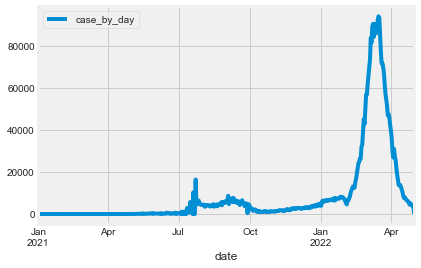

In [6]:
df_filtered[0].plot(x ='date', y='case_by_day', kind = 'line')

# Predicting case by day

In [7]:
new_df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    new_df[path] = df_filtered[path].set_index('date')

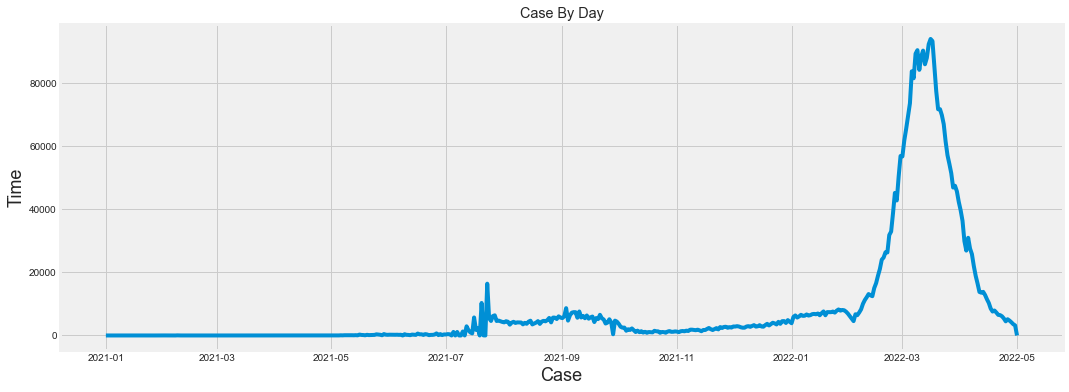

In [8]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[0]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

In [9]:
data = [None] * len(DATA_PATH)
dataset = [None] * len(DATA_PATH)
training_data_len = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create a new dataframe with only the 'Close column 
    data[path] = new_df[path].filter(['case_by_day'])
    # Convert the dataframe to a numpy array
    dataset[path] = data[path].values
    # Get the number of rows to train the model on
    # training_data_len[path] = int(np.ceil(len(dataset[path]) * .95 ))
    training_data_len[path] = len(dataset[path]) - 30
    print(training_data_len[path])

456


In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    scaled_data[path] = scaler.fit_transform(dataset[path])

scaled_data

[array([[0.00000000e+00],
        [2.12827089e-05],
        [5.32067722e-05],
        [2.12827089e-05],
        [3.19240633e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.12827089e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.06413544e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [4.25654177e-05],
        [5.32067722e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.12827089e-05],
        [1.06413544e-05],
        [4.25654177e-05],
        [0.00000000e+00],
        [1.06413544e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.06413544e-05],
        [2.12827089e-05],
        [0.00000000e+00],
        [8.51308355e-05],
        [2.12827089e-04],
        [1.06413544e-04],
        [1.38337608e-04],
        [1.38337608e-04],
        [1.06413544e-04],
        [5.32067722e-05],
        [3.19240633e-05],
        [4.25654177e-05],
        [3.19240633e-05],
        [0.00000000e+00],
        [3.7

In [11]:
DATA_LEN = 60
train_data = [None] * len(DATA_PATH)
test_data = [None] * len(DATA_PATH)
x_train = [None] * len(DATA_PATH)
y_train = [None] * len(DATA_PATH)
x_test = [None] * len(DATA_PATH)
y_test = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create the training data set 
    # Create the scaled training data set
    train_data[path] = scaled_data[path][0:int(training_data_len[path]), :]
    # Split the data into x_train and y_train data sets
    x_train[path] = []
    y_train[path] = []

    for idx in range(DATA_LEN, len(train_data[path])):
        x_train[path].append(train_data[path][idx - DATA_LEN: idx, 0])
        y_train[path].append(train_data[path][idx, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_train[path], y_train[path] = np.array(x_train[path]), np.array(y_train[path])

    # Reshape the data
    x_train[path] = np.reshape(x_train[path], (x_train[path].shape[0], x_train[path].shape[1], 1))
    
    # Create the testing data set
    test_data[path] = scaled_data[path][training_data_len[path] - DATA_LEN: , :]
    # Create the data sets x_test and y_test
    x_test[path] = []
    y_test[path] = scaled_data[path][training_data_len[path]:, :]
    for i in range(DATA_LEN, len(test_data[path])):
        x_test[path].append(test_data[path][i - DATA_LEN: i, 0])

    # Convert the data to a numpy array
    x_test[path], y_test[path] = np.array(x_test[path]), np.array(y_test[path])

    # Reshape the data
    x_test[path] = np.reshape(x_test[path], (x_test[path].shape[0], x_test[path].shape[1], 1 ))
    
x_train, y_train, x_test, y_test

([array([[[0.00000000e+00],
          [2.12827089e-05],
          [5.32067722e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[2.12827089e-05],
          [5.32067722e-05],
          [2.12827089e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[5.32067722e-05],
          [2.12827089e-05],
          [3.19240633e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         ...,
  
         [[8.49712151e-02],
          [8.02996605e-02],
          [7.36381727e-02],
          ...,
          [5.47284858e-01],
          [4.98909261e-01],
          [5.04964192e-01]],
  
         [[8.02996605e-02],
          [7.36381727e-02],
          [6.52421440e-02],
          ...,
          [4.98909261e-01],
          [5.04964192e-01],
          [4.86086429e-01]],
  
         [[7.36381727e-02],
          [6.5242144

In [12]:
from functools import reduce

X_train = x_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_train[1:], x_train[0])
Y_train = y_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_train[1:], y_train[0])
X_test = x_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_test[1:], x_test[0])
Y_test = y_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_test[1:], y_test[0])

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

# Build the LSTM model
model = Sequential() 
model.add(LSTM(30, return_sequences=True, input_shape=(DATA_LEN, 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 20)                4080      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,141
Trainable params: 8,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Train the model
model.fit(
    X_train, 
    Y_train, 
    batch_size=8, 
    epochs=50,
    validation_data=(X_test, Y_test)
)

Epoch 1/50
50/50 [==============================] - 5s 40ms/step - loss: 0.0076 - val_loss: 0.0300
Epoch 2/50
50/50 [==============================] - 2s 31ms/step - loss: 0.0043 - val_loss: 0.0333
Epoch 3/50
50/50 [==============================] - 1s 28ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 4/50
50/50 [==============================] - 1s 28ms/step - loss: 0.0011 - val_loss: 0.0127
Epoch 5/50
50/50 [==============================] - 1s 29ms/step - loss: 9.5327e-04 - val_loss: 6.0569e-04
Epoch 6/50
50/50 [==============================] - 1s 30ms/step - loss: 6.2050e-04 - val_loss: 7.1556e-04
Epoch 7/50
50/50 [==============================] - 1s 29ms/step - loss: 7.4751e-04 - val_loss: 0.0028
Epoch 8/50
50/50 [==============================] - 2s 31ms/step - loss: 5.7921e-04 - val_loss: 9.4416e-04
Epoch 9/50
50/50 [==============================] - 2s 33ms/step - loss: 5.9707e-04 - val_loss: 7.2105e-04
Epoch 10/50
50/50 [==============================] - 2s 38ms/step - loss:

In [16]:
train_predictions = [None] * len(DATA_PATH)
test_predictions = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Get the models predicted price values
    train_predictions[path] = model.predict(x_train[path])
    test_predictions[path] = model.predict(x_test[path])
    train_predictions[path] = scaler.inverse_transform(train_predictions[path])
    test_predictions[path] = scaler.inverse_transform(test_predictions[path])

    # Get the root mean squared error (RMSE)
    # train_rmse = np.sqrt(np.mean(((train_predictions[path] - scaler.inverse_transform(y_train[path])) ** 2)))
    test_rmse = np.sqrt(np.mean(((test_predictions[path] - scaler.inverse_transform(y_test[path])) ** 2)))
    print(test_rmse)

5831.435559650064


In [17]:
val_loss = model.evaluate(X_test, Y_test, batch_size=8)

4/4 [==============================] - 0s 10ms/step - loss: 0.0039


In [18]:
train = [None] * len(DATA_PATH)
test_valid = [None] * len(DATA_PATH)
train_valid = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    train[path] = data[path][:training_data_len[path]]
    test_valid[path] = data[path][training_data_len[path]:]
    test_valid[path].insert(1, 'case_by_day_test_predict', test_predictions[path])
    train_valid[path] = data[path][60:training_data_len[path]]
    train_valid[path].insert(1, 'case_by_day_train_predict', train_predictions[path])

In [19]:
# for path in range(len(DATA_PATH)):
#     for idx in range(len(valid[path].index)):
#         valid[path].iat[idx, 0] = 0 if valid[path].iat[idx, 0] < 0 else valid[path].iat[idx, 0]
#         valid[path].iat[idx, 1] = 0 if valid[path].iat[idx, 1] < 0 else valid[path].iat[idx, 1]

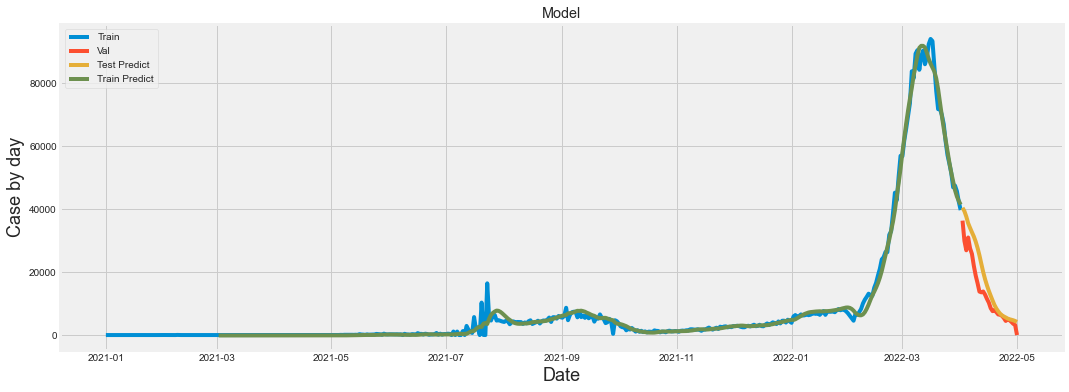

In [20]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[0]['case_by_day'])
plt.plot(test_valid[0][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[0]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [21]:
# # Show the valid and predicted prices
# valid[0]

In [22]:
# # Show the valid and predicted prices
# valid[1]

In [23]:
# # Show the valid and predicted prices
# valid[2]

In [24]:
# # Show the valid and predicted prices
# valid[3]

In [25]:
# # Show the valid and predicted prices
# valid[4]

In [26]:
model.save(model_save_path, include_optimizer=False)